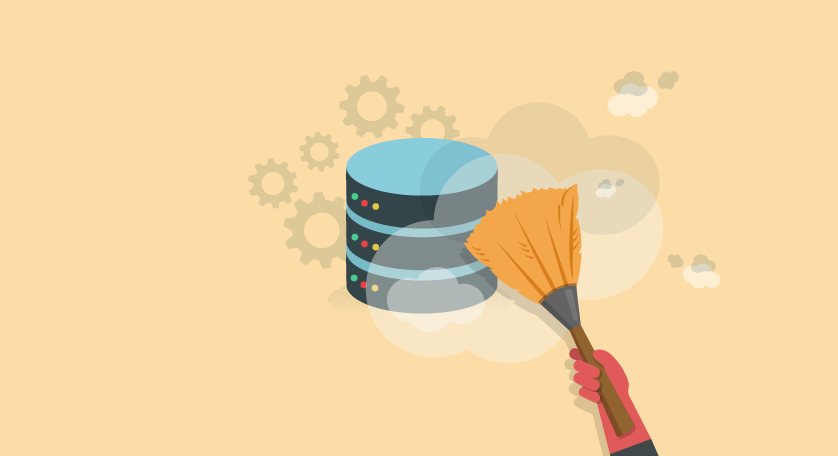

*Imagen:https://bigprofitdata.com/wp-content/uploads/2020/06/limpiar-db.png*

# Transformación y Limpieza

# Algunas transformaciones

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo CSV
df = pd.read_excel("https://github.com/restevesd/DataCleaning/blob/main/limpiezatransformacion.xlsx?raw=true")

In [ ]:
df.head()

,codigo_genero,edad,ingreso_neto,gasto_tarjeta
0,1,22.0,6405.0,39894.228040
1,0,NaN,9782.0,NaN
2,1,55.0,5095.0,13.383023
3,1,70.0,9379.0,500.000000
4,1,36.0,NaN,443.184841


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   codigo_genero  27 non-null     int64  
 1   edad           25 non-null     float64
 2   ingreso_neto   25 non-null     float64
 3   gasto_tarjeta  25 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 992.0 bytes


In [ ]:
# Cambiar el nombre de la columna codigo_genero a genero
df = df.rename(columns={'codigo_genero': 'genero'})

In [ ]:
df.head()

,genero,edad,ingreso_neto,gasto_tarjeta
0,1,22.0,6405.0,39894.228040
1,0,NaN,9782.0,NaN
2,1,55.0,5095.0,13.383023
3,1,70.0,9379.0,500.000000
4,1,36.0,NaN,443.184841


In [ ]:
# Convertir la columna edad a tipo int
df['edad'] = df['edad'].astype(int)

#¿Porque da error? (lo veremos más adelante)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
#convertimos la columna genero a categorical
df["genero"] = pd.Categorical(df["genero"] )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   genero         27 non-null     category
 1   edad           25 non-null     float64 
 2   ingreso_neto   25 non-null     float64 
 3   gasto_tarjeta  25 non-null     float64 
dtypes: category(1), float64(3)
memory usage: 927.0 bytes


In [ ]:
df

,genero,edad,ingreso_neto,gasto_tarjeta
0,1,22.0,6405.0,39894.228040
1,0,NaN,9782.0,NaN
2,1,55.0,5095.0,13.383023
3,1,70.0,9379.0,500.000000
4,1,36.0,NaN,443.184841
5,1,25.0,7744.0,13.383023
6,1,20.0,2391.0,443.184841
7,0,70.0,2070.0,39894.228040
8,0,68.0,6018.0,NaN
9,0,25.0,2497.0,443.184841


# Limpieza de datos con Pandas

In [ ]:
#Veamos si hay valores faltantes
df.isnull().sum()

genero           0
edad             2
ingreso_neto     2
gasto_tarjeta    2
dtype: int64

In [ ]:
df['ingreso_neto'].mean()

4977.08

In [ ]:
# Corregir los valores faltantes de ingreso_neto con el promedio
promedio = df['ingreso_neto'].mean()
df.loc[df["ingreso_neto"].isna(), 'ingreso_neto'] = promedio

In [ ]:
#Veamos si hay valores faltantes
df.isnull().sum()

genero           0
edad             2
ingreso_neto     2
gasto_tarjeta    2
dtype: int64

In [ ]:
#también se puede
df["ingreso_neto"] = df["ingreso_neto"].fillna(promedio)

In [ ]:
#Veamos si hay valores faltantes
df.isnull().sum()

genero           0
edad             2
ingreso_neto     0
gasto_tarjeta    2
dtype: int64

In [ ]:
#usando sklearn
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # ------ >¿ Qué otras estrategias hay ?
df["ingreso_neto"] = imputer.fit_transform(df[["ingreso_neto"]])

In [ ]:
#Veamos si hay valores faltantes
df.isnull().sum()

genero           0
edad             2
ingreso_neto     0
gasto_tarjeta    2
dtype: int64

In [ ]:
df["ingreso_neto"]

0     6405.00
1     9782.00
2     5095.00
3     9379.00
4     4977.08
5     7744.00
6     2391.00
7     2070.00
8     6018.00
9     2497.00
10    4979.00
11    3165.00
12    1565.00
13    7172.00
14    9323.00
15    3679.00
16    2783.00
17    2282.00
18    5943.00
19    1442.00
20    2078.00
21    4329.00
22    7075.00
23    4977.08
24    6491.00
25    5317.00
26    5423.00
Name: ingreso_neto, dtype: float64

In [ ]:
df.isnull().sum()

genero           0
edad             2
ingreso_neto     0
gasto_tarjeta    2
dtype: int64

In [ ]:
# Corregir los valores faltantes de edad con la mediana
mediana = df['edad'].median()
df.loc[df["edad"].isna(), 'edad'] = df['edad'].median()

In [ ]:
#escribir el código para implementar las otras dos estrategias
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df["edad"] = imputer.fit_transform(df[["edad"]])

In [ ]:
# Reemplazar los valores faltantes en la columna edad por la media de la columna -- usando inplace
df['edad'].fillna(df['edad'].median(), inplace=True)
#

In [ ]:
# Reemplazar los valores faltantes en la columna edad por la media de la columna -- usando inplace
df['edad'].fillna(df['edad'].mean(), inplace=True)

In [ ]:
mediana = df['edad'].median()
df["edad"] = df["edad"].fillna(mediana)
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df["edad"] = imputer.fit_transform(df[["edad"]])

In [ ]:
df.isnull().sum()

genero           0
edad             0
ingreso_neto     0
gasto_tarjeta    2
dtype: int64

In [ ]:
# Corregir los valores faltantes de gasto_tarjeta usando un imputador simple
from sklearn.impute import SimpleImputer

# Crear un objeto SimpleImputer con la estrategia mean
imputer = SimpleImputer(strategy='mean')

# Reemplazar los valores nulos en la columna gasto_tarjeta
df['gasto_tarjeta'] = imputer.fit_transform(df[['gasto_tarjeta']])

In [ ]:
# Escribir el código para las otras dos estrategias
df.loc[df["gasto_tarjeta"].isna(), 'gasto_tarjeta'] = df['gasto_tarjeta'].mean()


##

In [ ]:
df["gasto_tarjeta"] = df["gasto_tarjeta"].fillna(df['gasto_tarjeta'].mean())
df.loc[df["gasto_tarjeta"].isna(), 'gasto_tarjeta'] = df['gasto_tarjeta'].mean()

In [ ]:
df.isnull().sum()

genero           0
edad             0
ingreso_neto     0
gasto_tarjeta    0
dtype: int64

In [ ]:
df

,genero,edad,ingreso_neto,gasto_tarjeta
0,1,22.0,6405.00,39894.228040
1,0,46.0,9782.00,12975.922520
2,1,55.0,5095.00,13.383023
3,1,70.0,9379.00,500.000000
4,1,36.0,4977.08,443.184841
5,1,25.0,7744.00,13.383023
6,1,20.0,2391.00,443.184841
7,0,70.0,2070.00,39894.228040
8,0,68.0,6018.00,12975.922520
9,0,25.0,2497.00,443.184841


In [ ]:
# Eliminar las filas que contienen valores faltantes
df = df.dropna()

In [ ]:
# Convertir la columna edad a tipo int
df['edad'] = df['edad'].astype(int)

#¿Porque no dio error? -> Porque ya no hay NA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   genero         27 non-null     category
 1   edad           27 non-null     int64   
 2   ingreso_neto   27 non-null     float64 
 3   gasto_tarjeta  27 non-null     float64 
dtypes: category(1), float64(2), int64(1)
memory usage: 927.0 bytes


In [ ]:
df

,genero,edad,ingreso_neto,gasto_tarjeta
0,1,22,6405.00,39894.228040
1,0,46,9782.00,12975.922520
2,1,55,5095.00,13.383023
3,1,70,9379.00,500.000000
4,1,36,4977.08,443.184841
5,1,25,7744.00,13.383023
6,1,20,2391.00,443.184841
7,0,70,2070.00,39894.228040
8,0,68,6018.00,12975.922520
9,0,25,2497.00,443.184841


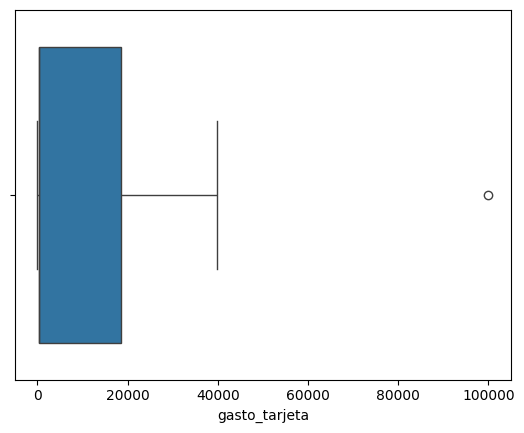

In [ ]:
# Identificación de valores atípicos en la columna gasto_tarjeta
import seaborn as sns

sns.boxplot(data=df, x='gasto_tarjeta')
plt.show()

In [ ]:
# Eliminar las filas que contienen valores atípicos en la columna ingreso_neto
q1 = df['gasto_tarjeta'].quantile(0.25)
q3 = df['gasto_tarjeta'].quantile(0.75)
iqr = q3 - q1

In [ ]:
q1

443.18484119380076

In [ ]:
q3

18586.49748606743

In [ ]:
iqr

18143.31264487363

In [ ]:
umbral_inferior = q1 - (1.5 * iqr)
umbral_superior = q3 + (1.5 * iqr)

In [ ]:
umbral_inferior #esto está bien ? qué debería ser ?

-26771.784126116643

In [ ]:
umbral_superior

45801.46645337787

In [ ]:
#dentro del rango
df[(df['gasto_tarjeta'] >= umbral_inferior) & (df['gasto_tarjeta'] <= umbral_superior)]

,genero,edad,ingreso_neto,gasto_tarjeta
0,1,22,6405.00,39894.228040
1,0,46,9782.00,12975.922520
2,1,55,5095.00,13.383023
3,1,70,9379.00,500.000000
4,1,36,4977.08,443.184841
5,1,25,7744.00,13.383023
6,1,20,2391.00,443.184841
7,0,70,2070.00,39894.228040
8,0,68,6018.00,12975.922520
9,0,25,2497.00,443.184841


In [ ]:
#fuera del rango
df[(df['gasto_tarjeta'] < umbral_inferior) | (df['gasto_tarjeta'] > umbral_superior)]

,genero,edad,ingreso_neto,gasto_tarjeta
11,0,46,3165.0,100000.0


In [ ]:
#dejamos en el dataframe solamente los valores dentro del rango
df = df[(df['gasto_tarjeta'] >= umbral_inferior) & (df['gasto_tarjeta'] <= umbral_superior)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 0 to 26
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   genero         26 non-null     category
 1   edad           26 non-null     int64   
 2   ingreso_neto   26 non-null     float64 
 3   gasto_tarjeta  26 non-null     float64 
dtypes: category(1), float64(2), int64(1)
memory usage: 982.0 bytes


In [ ]:
# Eliminar la columna genero
df = df.drop('genero', axis=1)

In [ ]:
df

,edad,ingreso_neto,gasto_tarjeta
0,22,6405.00,39894.228040
1,46,9782.00,12975.922520
2,55,5095.00,13.383023
3,70,9379.00,500.000000
4,36,4977.08,443.184841
5,25,7744.00,13.383023
6,20,2391.00,443.184841
7,70,2070.00,39894.228040
8,68,6018.00,12975.922520
9,25,2497.00,443.184841
